In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from imblearn.combine import SMOTEENN
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv("/home/walaa-shaaban/Documents/project/bank-additional-full.csv", sep=';')
df.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16258,54,retired,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


# Preprocessing Data & EDA

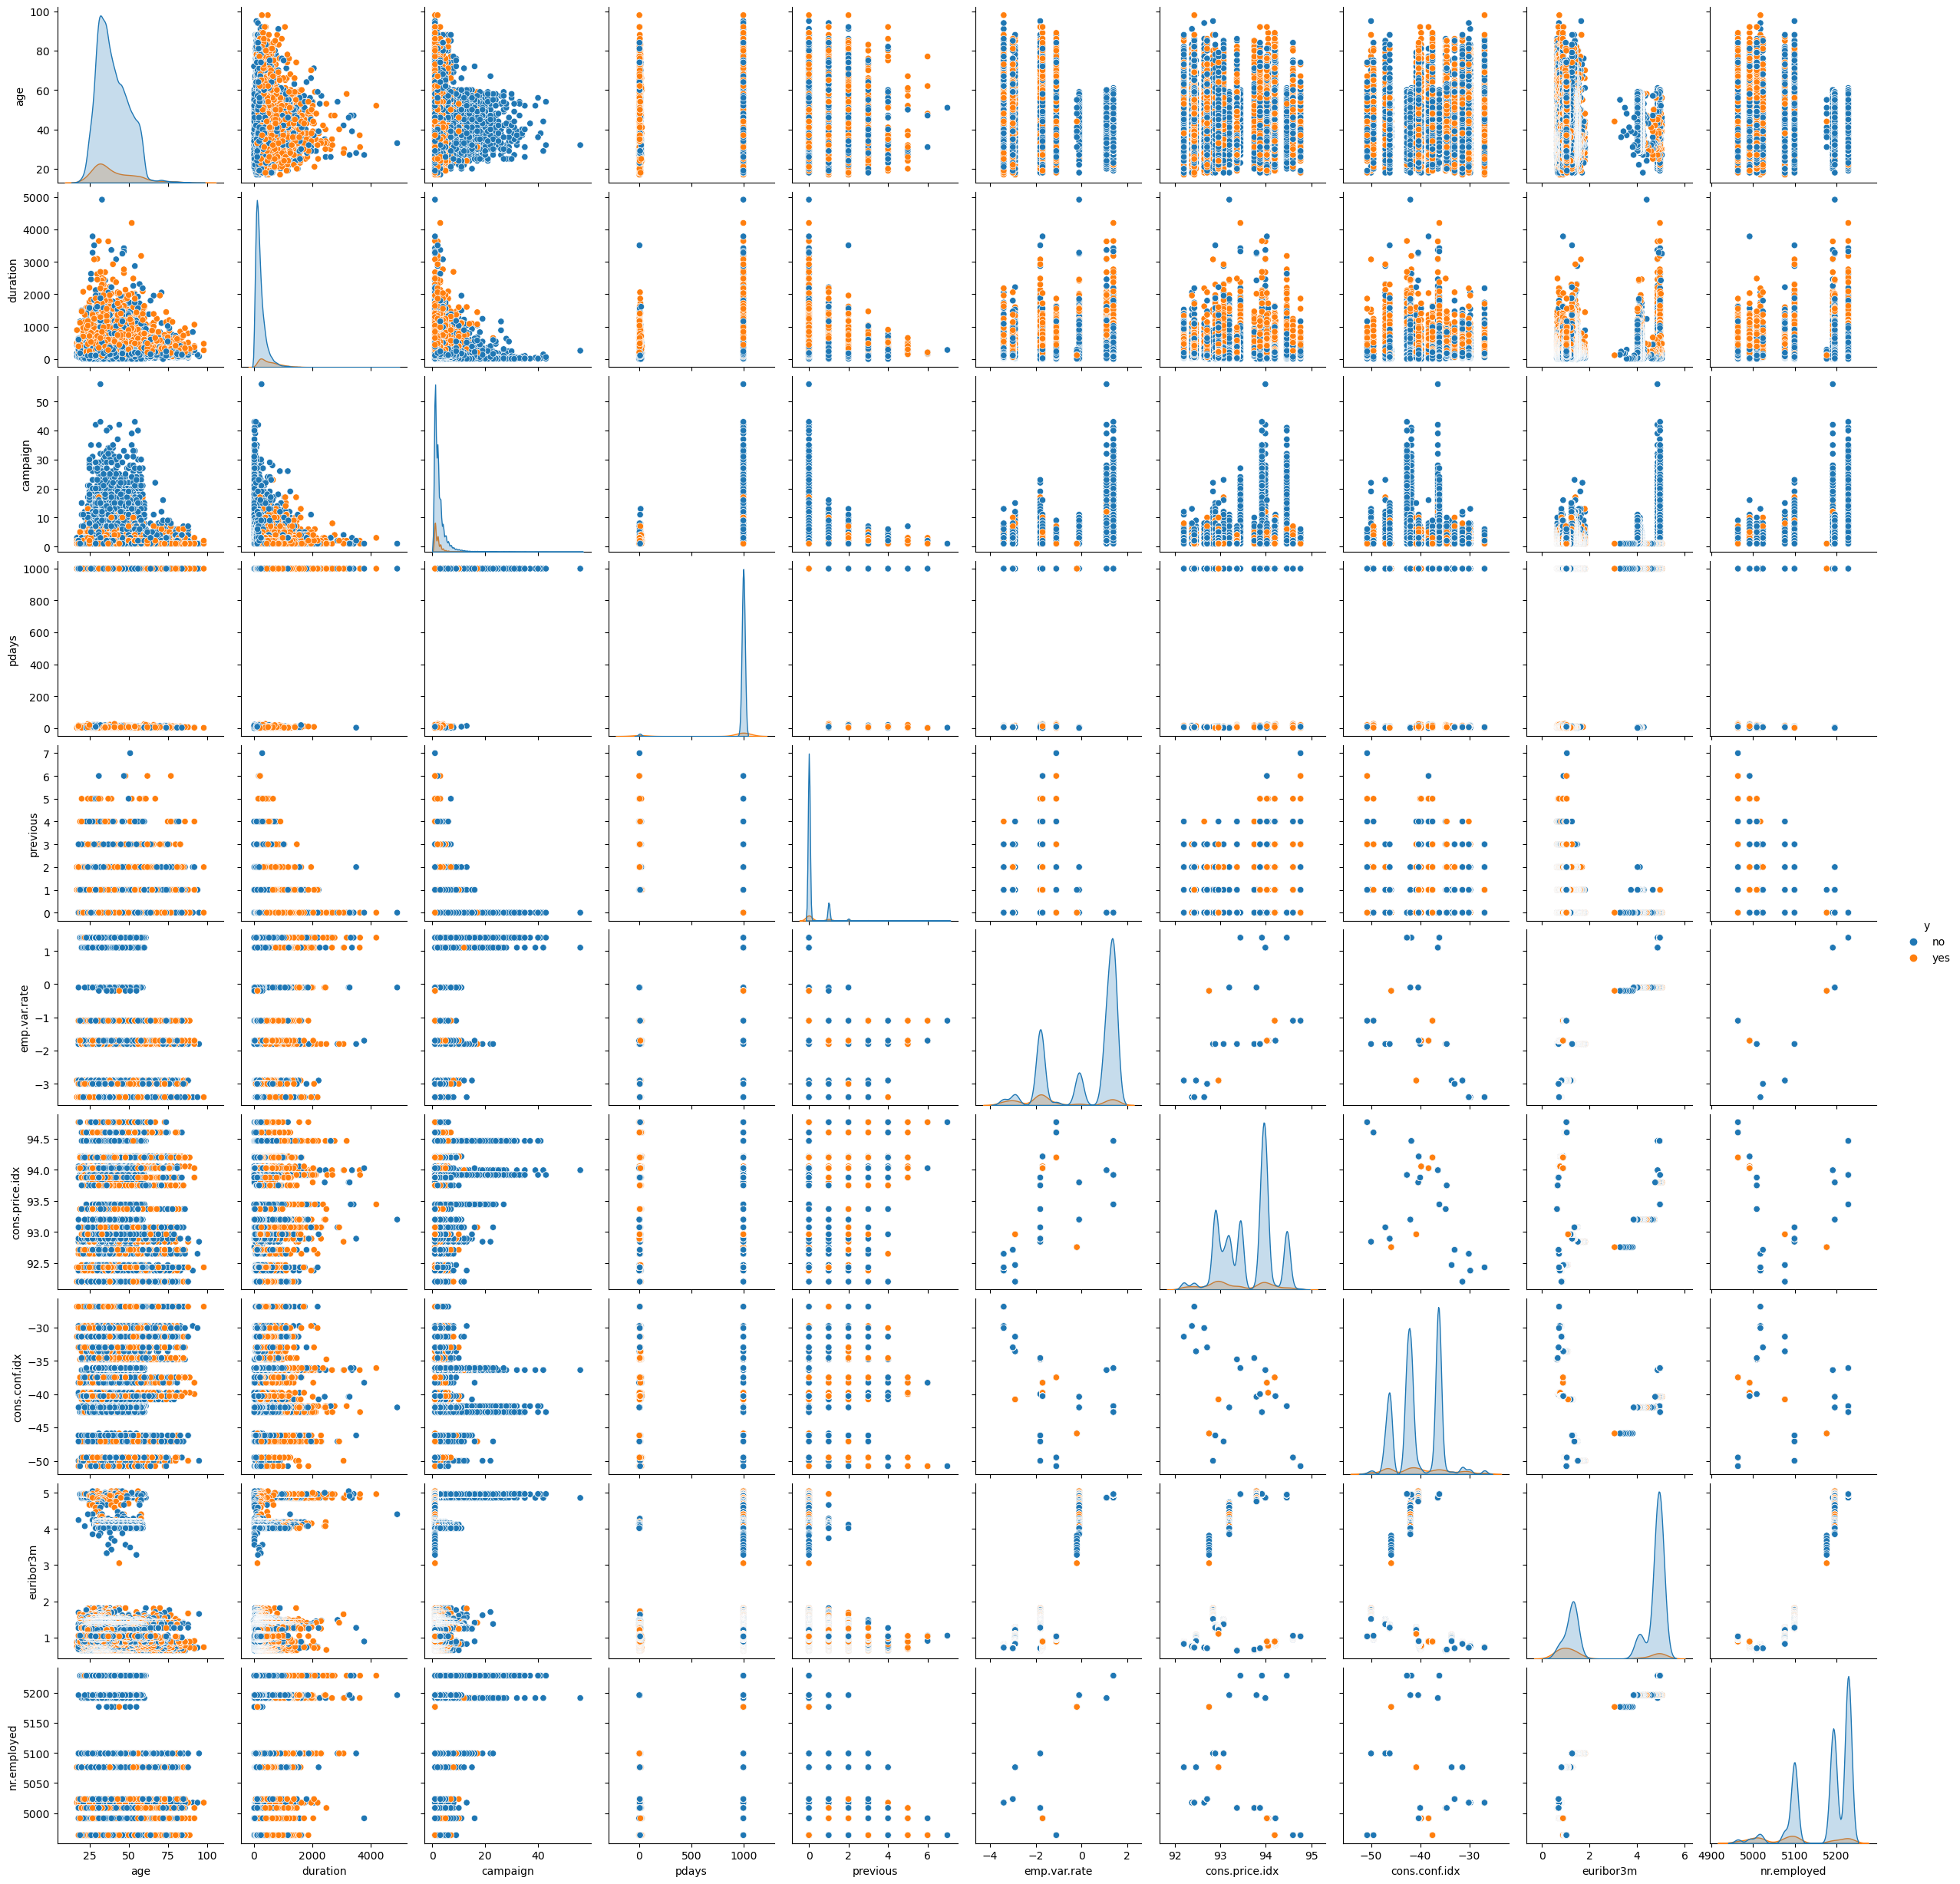

In [3]:
sns.pairplot(df, hue='y')

In [43]:
df.drop_duplicates(inplace=True)

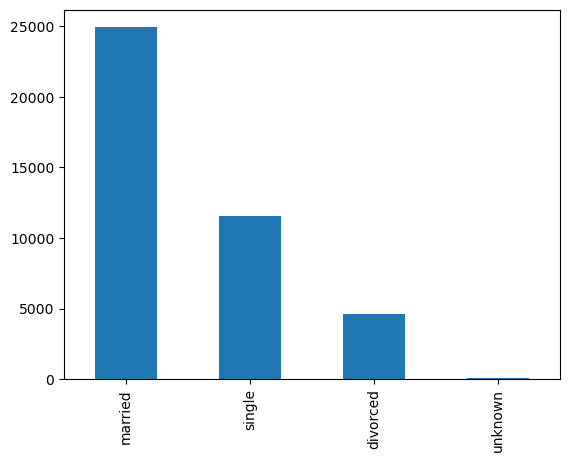

In [44]:
df['marital'].value_counts().plot(kind='bar');

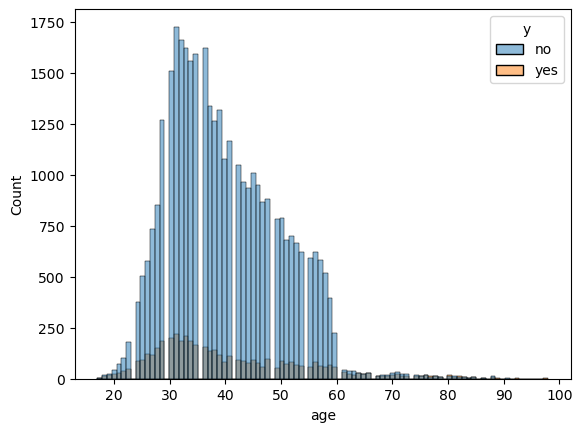

In [45]:
sns.histplot(x ='age', hue='y', data = df);

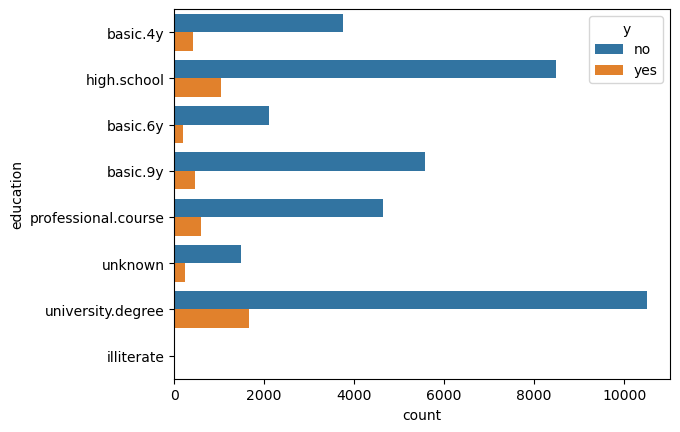

In [46]:
sns.countplot(y='education', hue='y', data=df);

In [10]:
color = sns.color_palette()[0]

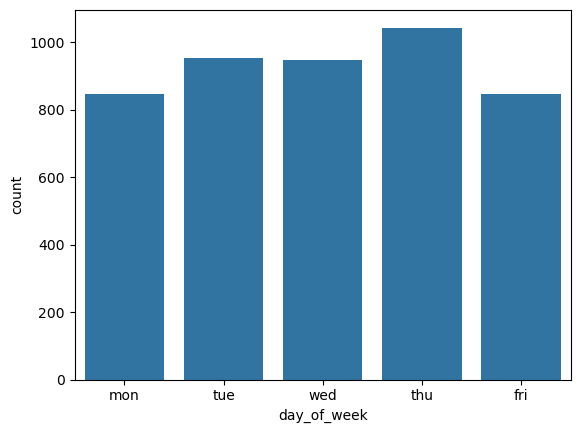

In [47]:
sns.countplot(x='day_of_week', data=df[df['y']=='yes'], color=color);

In [48]:
df = pd.get_dummies(df)

In [49]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [50]:
df.drop(['y_no'], axis=1, inplace=True)
df.rename(columns={"y_yes": "subscribed"}, inplace=True)

In [51]:
df.shape

(41176, 64)

In [52]:
columns = df.columns

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   pdays                          41176 non-null  int64  
 4   previous                       41176 non-null  int64  
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  job_admin.                     41176 non-null  uint8  
 11  job_blue-collar                41176 non-null  uint8  
 12  job_entrepreneur               41176 non-null 

In [54]:
df = MinMaxScaler().fit_transform(df)

In [55]:
df = pd.DataFrame(data=df, columns=columns)

In [56]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
X = df.drop('subscribed', axis=1)
y = df['subscribed']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [59]:
smtom = SMOTEENN()
X_train, y_train = smtom.fit_resample(X_train, y_train)

# Build Model 

In [60]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                2048      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_fit = model.fit(X_train, y_train, 
        epochs=30,
        batch_size=10,
        validation_split=0.2,
        shuffle=True,
        verbose=1)


Epoch 1/30
3623/3623 [==============================] - 12s 3ms/step - loss: 0.3144 - accuracy: 0.8688 - val_loss: 0.2333 - val_accuracy: 0.8980
Epoch 2/30
3623/3623 [==============================] - 12s 3ms/step - loss: 0.2026 - accuracy: 0.9260 - val_loss: 0.2281 - val_accuracy: 0.8974
Epoch 3/30
3623/3623 [==============================] - 13s 4ms/step - loss: 0.1854 - accuracy: 0.9329 - val_loss: 0.1191 - val_accuracy: 0.9576
Epoch 4/30
3623/3623 [==============================] - 15s 4ms/step - loss: 0.1750 - accuracy: 0.9349 - val_loss: 0.1312 - val_accuracy: 0.9523
Epoch 5/30
3623/3623 [==============================] - 18s 5ms/step - loss: 0.1680 - accuracy: 0.9392 - val_loss: 0.1399 - val_accuracy: 0.9479
Epoch 6/30
3623/3623 [==============================] - 17s 5ms/step - loss: 0.1619 - accuracy: 0.9405 - val_loss: 0.1720 - val_accuracy: 0.9319
Epoch 7/30
3623/3623 [==============================] - 14s 4ms/step - loss: 0.1572 - accuracy: 0.9428 - val_loss: 0.1177 - val_ac

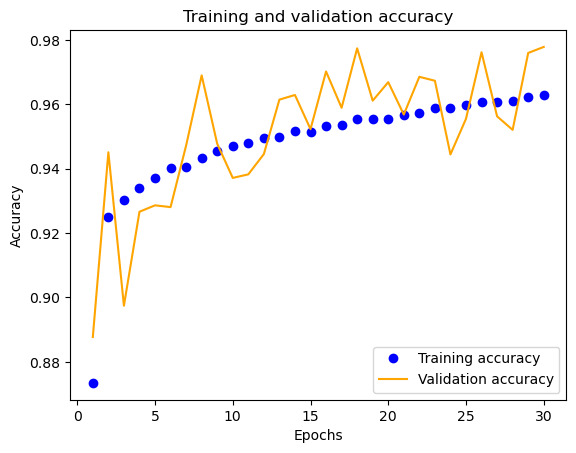

In [36]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
loss_and_metrics = model.evaluate(X_test, y_test)
print("loss is ", loss_and_metrics[0])
print("metrics is ", loss_and_metrics[1])

258/258 [==============================] - 1s 3ms/step - loss: 0.4893 - accuracy: 0.8601
loss is  0.48933079838752747
metrics is  0.860126256942749


In [38]:
y_pred = model.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

258/258 [==============================] - 1s 3ms/step


In [39]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6336,  972],
       [ 180,  748]])

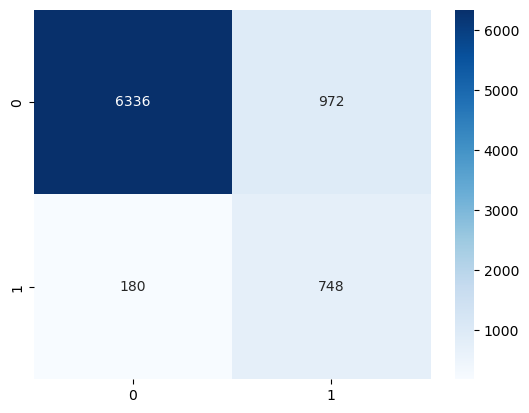

In [40]:
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues');
